<a href="https://colab.research.google.com/github/Himanshu0518/Agroassist/blob/main/Pest_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d vipoooool/new-plant-diseases-dataset

Dataset URL: https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset
License(s): copyright-authors


In [ ]:
from zipfile import ZipFile
file_name = "/content/new-plant-diseases-dataset.zip"
with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('done')

done


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline

In [ ]:
import matplotlib.image as mping

In [ ]:
img = mping.imread('/content/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train/Apple___Apple_scab/00075aa8-d81a-4184-8541-b692b78d398a___FREC_Scab 3335.JPG')

In [ ]:
print(type(img))
print(img.shape)

<class 'numpy.ndarray'>
(256, 256, 3)


array([[[167, 163, 196],
        [166, 162, 195],
        [165, 161, 194],
        ...,
        [185, 182, 211],
        [183, 180, 209],
        [181, 178, 207]],

       [[170, 166, 199],
        [169, 165, 198],
        [168, 164, 197],
        ...,
        [186, 183, 212],
        [184, 181, 210],
        [183, 180, 209]],

       [[170, 166, 199],
        [169, 165, 198],
        [168, 164, 197],
        ...,
        [188, 185, 214],
        [186, 183, 212],
        [185, 182, 211]],

       ...,

       [[100,  90, 124],
        [102,  92, 126],
        [104,  94, 128],
        ...,
        [126, 110, 137],
        [126, 110, 137],
        [126, 110, 137]],

       [[101,  91, 125],
        [102,  92, 126],
        [103,  93, 127],
        ...,
        [122, 106, 133],
        [123, 107, 134],
        [123, 107, 134]],

       [[104,  94, 128],
        [103,  93, 127],
        [102,  92, 126],
        ...,
        [121, 105, 132],
        [122, 106, 133],
        [123, 107, 134]]], dtype=uint8)
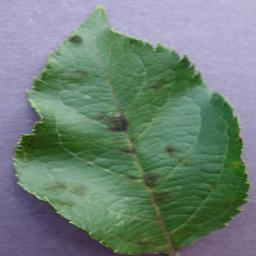

In [ ]:
img

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [ ]:
trainning_set = tf.keras.utils.image_dataset_from_directory(
   '/content/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train' ,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(150, 150),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)

Found 70295 files belonging to 38 classes.


In [ ]:
validation_set =  tf.keras.utils.image_dataset_from_directory(
   '/content/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid' ,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(150, 150),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)

Found 17572 files belonging to 38 classes.


In [ ]:
print("Class names:", trainning_set.class_names)

Class names: ['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomat

In [ ]:
predicted_index = 29

# Use the class_names list to map the index to a crop name:
crop_name = trainning_set.class_names[predicted_index]
crop_name

'Tomato___Early_blight'

In [ ]:
crop_name.split('_')[-1]

'blight'

In [ ]:
# Your list of class names
class_names = [
    'Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy',
    'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy',
    'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_',
    'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot',
    'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy',
    'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy',
    'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight',
    'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy',
    'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy',
    'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold',
    'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite',
    'Tomato___Target_Spot', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Tomato_mosaic_virus',
    'Tomato___healthy'
]

# Process the list to extract only the disease/pest names (i.e. non-healthy)
pest_names = []
for cn in class_names:
    # Split the string on the triple underscore
    parts = cn.split('___')
    if len(parts) > 1:
        disease = parts[1]
        pest_names.append(disease)

print("Pest/Disease names:", pest_names)


Pest/Disease names: ['Apple_scab', 'Black_rot', 'Cedar_apple_rust', 'healthy', 'healthy', 'Powdery_mildew', 'healthy', 'Cercospora_leaf_spot Gray_leaf_spot', 'Common_rust_', 'Northern_Leaf_Blight', 'healthy', 'Black_rot', 'Esca_(Black_Measles)', 'Leaf_blight_(Isariopsis_Leaf_Spot)', 'healthy', 'Haunglongbing_(Citrus_greening)', 'Bacterial_spot', 'healthy', 'Bacterial_spot', 'healthy', 'Early_blight', 'Late_blight', 'healthy', 'healthy', 'healthy', 'Powdery_mildew', 'Leaf_scorch', 'healthy', 'Bacterial_spot', 'Early_blight', 'Late_blight', 'Leaf_Mold', 'Septoria_leaf_spot', 'Spider_mites Two-spotted_spider_mite', 'Target_Spot', 'Tomato_Yellow_Leaf_Curl_Virus', 'Tomato_mosaic_virus', 'healthy']


In [ ]:
len(class_names)

38

In [ ]:
def process(image,label):
  import tensorflow
  image = tensorflow.cast(image/255.0,tensorflow.float32)
  return image,label

trainning_set = trainning_set.map(process)
validation_set = validation_set.map(process)

In [ ]:
import tensorflow as tf
print("GPU:", tf.config.list_physical_devices('GPU'))


GPU: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


# Custum CNN model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [ ]:
model = Sequential()
model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(38, activation='softmax'))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 73984)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │      18,940,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 38)                  │           9,766 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 19,320,742 (73.70 MB)

 Trainable params: 19,320,742 (73.70 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.fit(trainning_set, validation_data=validation_set, epochs=10, verbose=1)

Epoch 1/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 127s 58ms/step - accuracy: 0.9611 - loss: 0.1247 - val_accuracy: 0.9445 - val_loss: 0.2181
Epoch 2/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 140s 57ms/step - accuracy: 0.9595 - loss: 0.1275 - val_accuracy: 0.9532 - val_loss: 0.1700
Epoch 3/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 117s 53ms/step - accuracy: 0.9658 - loss: 0.1093 - val_accuracy: 0.9548 - val_loss: 0.1741
Epoch 4/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 151s 57ms/step - accuracy: 0.9673 - loss: 0.1111 - val_accuracy: 0.9573 - val_loss: 0.1751
Epoch 5/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 126s 57ms/step - accuracy: 0.9703 - loss: 0.1004 - val_accuracy: 0.9550 - val_loss: 0.1867
Epoch 6/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 142s 57ms/step - accuracy: 0.9708 - loss: 0.0978 - val_accuracy: 0.9537 - val_loss: 0.2007
Epoch 7/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 133s 53ms/step - accuracy: 0.9712 - loss: 0.0980 - val_accuracy: 0.9546 - val_loss: 0.1911
Epoch 8/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 126s 57ms/step - accuracy: 

In [ ]:
model.save('pest_prediction.h5')
print("Model saved to model.h5")

Model saved to model.h5


# Transfer Learning and Fine tunning

In [ ]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
base_model.trainable = True

In [ ]:
set_trainable = False
for layer in base_model.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [ ]:
x = base_model.output  # Extract features from VGG16
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(128, activation='relu')(x)
output_layer = Dense(38, activation='softmax')(x)


In [ ]:
vgg_model = Model(inputs=base_model.input, outputs=output_layer)

# Compile Model
vgg_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Summary
vgg_model.summary()

Model: "functional_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 150, 150, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 150, 150, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 150, 150, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 75, 75, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 75, 75, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 75, 75, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 37, 37, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 37, 37, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 37, 37, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 37, 37, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 18, 18, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 18, 18, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 18, 18, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 18, 18, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 9, 9, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 9, 9, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 9, 9, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 9, 9, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 4, 4, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │       2,097,408 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 16,849,894 (64.28 MB)

 Trainable params: 9,214,630 (35.15 MB)

 Non-trainable params: 7,635,264 (29.13 MB)

In [ ]:
history = vgg_model.fit(
    trainning_set,
    validation_data=validation_set,
    epochs=10,
    verbose=1
)

In [ ]:
history.history

{'accuracy': [0.5866420269012451,
  0.847770094871521,
  0.8842876553535461,
  0.9012731909751892,
  0.9144889116287231,
  0.9200227856636047,
  0.9267799854278564,
  0.9302510619163513,
  0.9361405372619629,
  0.9377195835113525],
 'loss': [1.3762915134429932,
  0.48741286993026733,
  0.3832910358905792,
  0.3342948853969574,
  0.29550233483314514,
  0.2821987271308899,
  0.26663142442703247,
  0.25918564200401306,
  0.24439629912376404,
  0.24196133017539978],
 'val_accuracy': [0.837582528591156,
  0.8840200304985046,
  0.8976781368255615,
  0.9076940417289734,
  0.9061574935913086,
  0.9140109419822693,
  0.9019463062286377,
  0.9187912344932556,
  0.919474184513092,
  0.9253357648849487],
 'val_loss': [0.509617030620575,
  0.37716051936149597,
  0.33024105429649353,
  0.34159576892852783,
  0.3280544877052307,
  0.30483341217041016,
  0.37151074409484863,
  0.31179678440093994,
  0.3112518787384033,
  0.29091358184814453]}

In [ ]:
train_accurary = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

Text(0.5, 1.0, 'Training and Validation Accuracy')

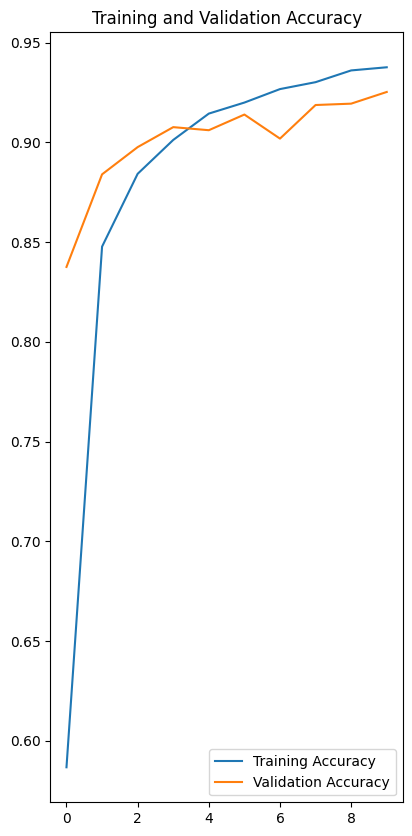

In [ ]:
plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.plot(train_accurary, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

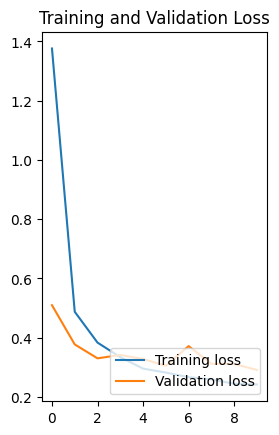

In [ ]:
plt.subplot(1, 2, 2)
plt.plot(train_loss, label='Training loss')
plt.plot(val_loss, label='Validation loss')
plt.legend(loc='lower right')
plt.title('Training and Validation Loss')
plt.show()